# Attacker Localization 
Using Weighted Centroid Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d:\softwares\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\softwares\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# UE positions (UE1 to UE11)
ue_positions = np.array([
    [10, 40],   # UE1
    [50, 20],   # UE2
    [115, 30],  # UE3
    [30, 70],   # UE4
    [115, 80],  # UE5
    [130, 150], # UE6
    [40, 100],  # UE7 - attacked
    [60, 90],   # UE8 - attacked
    [80, 100],  # UE9 - attacked
    [60, 130],  # UE10 - attacked
    [80, 120]   # UE11 - attacked
])

# Scaled SINR values (lower for attacked UEs)
sinr_values = np.array([
    42.43,  # UE1
    41.23,  # UE2
    41.61,  # UE3
    25.00,  # UE4
    24.62,  # UE5
    39.05,  # UE6
    15.00,  # UE7 - attacked
    7.50,   # UE8 - attacked
    7.50,   # UE9 - attacked
    15.81,  # UE10 - attacked
    11.18   # UE11 - attacked
])

In [3]:
# Convert SINR to weights: lower SINR = higher weight
epsilon = 1e-3  # to avoid divide-by-zero
weights = 1 / (sinr_values + epsilon)

# Normalize weights
weights = weights / np.sum(weights)

# Weighted average of UE positions
estimated_attacker_position = np.average(ue_positions, axis=0, weights=weights)

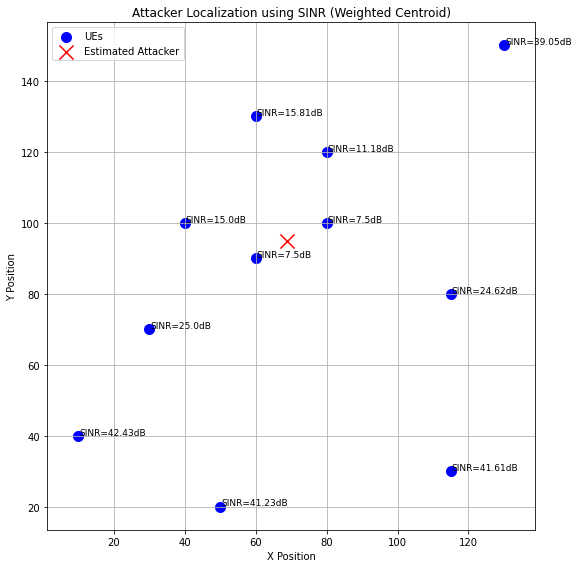

Estimated Attacker Position: [68.80818756 94.8566164 ]


In [4]:
# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(ue_positions[:, 0], ue_positions[:, 1], c='blue', label='UEs', s=100)
plt.scatter(estimated_attacker_position[0], estimated_attacker_position[1],
            c='red', label='Estimated Attacker', marker='x', s=200)

for i, sinr in enumerate(sinr_values):
    plt.text(ue_positions[i][0] + 0.3, ue_positions[i][1] + 0.3, f"SINR={sinr}dB", fontsize=9)

plt.title("Attacker Localization using SINR (Weighted Centroid)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Estimated Attacker Position: {estimated_attacker_position}")

The estimated attacker position is clase to the simulated position (70,100)